In [2]:
import numpy as np
import matplotlib.pyplot as plt

(200, 2)


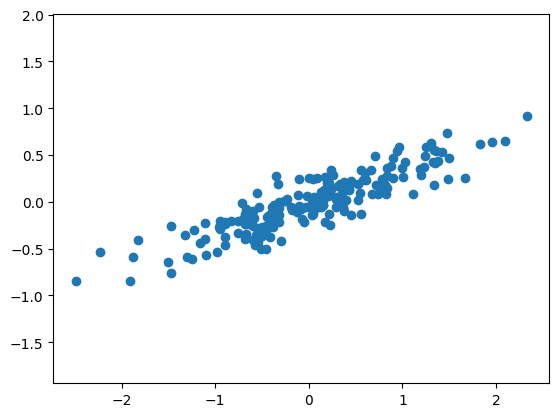

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

print(X.shape)